# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

# Libraries for part 2 : tokenizer tools
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# N-grams imports
from collections import Counter
from nltk import ngrams


# Named Enetity Recognition imports
import spacy
from spacy import displacy

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ludovicschneider/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file /opt/anaconda3/envs/finance/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/finance/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/finance/lib/python3.7/site

In [2]:
# Read your api key environment variable
load_dotenv('/Users/ludovicschneider/Bootcamp/LS.env')
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q='Bitcoin',
    sort_by='relevancy'
)
# Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

Total articles about Bitcoin: 19518


In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q='Ethereum',
    sort_by='relevancy'
)
# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

Total articles about Ethereum: 6215


In [38]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        # We only take the text of the articles - leaving out the title
        text = article["content"]
        # Limit the DF to the last 10 dates
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000
3,2021-05-17T23:27:59Z,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.0,0.925
4,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
1,2021-05-20,,0.0000,0.000,0.000,0.000
2,2021-05-19,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932
3,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000
4,2021-05-19,GPU shortages and inflated prices have become ...,-0.3612,0.067,0.132,0.801


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.102440,0.067350,0.041500,0.891100
std,0.501026,0.080911,0.053099,0.072249
min,-0.762700,0.000000,0.000000,0.718000
25%,-0.273200,0.000000,0.000000,0.844000
50%,0.064000,0.051500,0.000000,0.899000
75%,0.560725,0.118750,0.072000,0.938000
max,0.840200,0.282000,0.180000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.092850,0.033150,0.050600,0.866250
std,0.353291,0.049434,0.077435,0.220665
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.345300,0.000000,0.000000,0.838250
50%,0.000000,0.000000,0.000000,0.932000
75%,0.032000,0.066250,0.081750,1.000000
max,0.670500,0.188000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Create our own list of stopwords that we will add to the default one
sw_addon = {'tw', 'tweet', 'wednesday','additionally', 'hello', 'welcome back','week',
            'weekend', 'friend', 'yet', 'tuesday', 'night', 'month','months', 'overall', 'couple',
            'day', 'char', 'may', 'ha', 'wa', 'become', 'morning', 'using', 'Monday'}


In [11]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    re_clean = re_clean.replace('\\n','')
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stopwords
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    tokens = ' '.join(output)
    
    return tokens

In [12]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
# btc_df['tokens'] = btc_df.text.apply(lambda x: tokenizer(x))

In [13]:
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,el salvadors president nayib bukele made good ...
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,el salvador first country world recognize cryp...
2,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000,illustration alex castro verge cryptocurrency ...
3,2021-05-17T23:27:59Z,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.0,0.925,last whenelon musk tweeted spoken team doge de...
4,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,clean energy seemselon musk tesla caused rippl...


In [14]:
# Join and Print the column Tokens to review the words we would like to add to our stopwords list
btc_tokens_string= btc_df.tokens.str.cat()
btc_tokens_string

'el salvadors president nayib bukele made good promise adopt bitcoin legal tender officials central american country congress voted accept cryptocurrency majoriel salvador first country world recognize cryptocurrency bitcoin legal currency according president nayib bukele citizens ableillustration alex castro verge cryptocurrency exchange coinbase experiencing partial outage entire site application coinbase binlast whenelon musk tweeted spoken team doge developer make coin efficient impact predictable sent dogecoin moonclean energy seemselon musk tesla caused ripple cryptocurrency market past first announcing tesla bought billion worth bitcoilove affair elon musk bitcoin complicatedits rough crypto world price major crypto asset plummeting bitcoin particbitcoin ethereum host altcoins suffered massive drop erasing gain hundred billion market cap crypto market shrunkisnt greatest time cryptocurrency trader coinbase suffered hourslong outage th hindered transaction exchange company pinpoi

In [15]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,bitcoin ethereum host altcoins suffered massiv...
1,2021-05-20,,0.0000,0.000,0.000,0.000,
2,2021-05-19,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932,ethereum second largest cryptocurrency bitcoin...
3,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,representation virtual currency ethereum seen ...
4,2021-05-19,GPU shortages and inflated prices have become ...,-0.3612,0.067,0.132,0.801,gpu shortage inflated price byproduct growth c...


In [16]:
# Join and Print the column Tokens to review the words we would like to add to our stopwords list
eth_tokens_string= eth_df.tokens.str.cat()
eth_tokens_string

'bitcoin ethereum host altcoins suffered massive drop erasing gain hundred billion market cap crypto market shrunkethereum second largest cryptocurrency bitcoin away shifting underlying infrastructure new model would slash carbon emission hundredfold projrepresentation virtual currency ethereum seen front stock graph illustration taken february reutersdado ruvicillustrationfile photocryptocurrency ethereum extendegpu shortage inflated price byproduct growth cryptomining needless say thats bad news gamers make big chunk computing industry customerillustration alex castro verge cryptocurrency exchange coinbase experiencing partial outage entire site application coinbase binarticle translated spanish edition ai technology errors exist due processlast vitalik buterin became youngest billionaire world yeethereum reduce energy consumption following transition proofofstake according new blog post carl beekhuizen ethereum foundation beekhuizen estimated thnew mining feature called norton crypt

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
# Generate the Bitcoin N-grams where N=2
# Create a list of all the tokens (throughout all the rows) from the string we created in column 'tokens'
btc_tokens= btc_df.tokens.str.cat().split()
btc_tokens[:10]

['el',
 'salvadors',
 'president',
 'nayib',
 'bukele',
 'made',
 'good',
 'promise',
 'adopt',
 'bitcoin']

In [18]:
# Create the ngrams
btc_bigrams= ngrams(btc_tokens, n=2)

# Add the result into a DF and list the top 20 only
btc_bigrams_df= pd.DataFrame(Counter(btc_bigrams).most_common(20), columns=['bigram', 'count'])
btc_bigrams_df

,bigram,count
0,"(president, nayib)",2
1,"(nayib, bukele)",2
2,"(bitcoin, legal)",2
3,"(salvador, first)",2
4,"(first, country)",2
5,"(country, world)",2
6,"(elon, musk)",2
7,"(back, reviewlast)",2
8,"(reviewlast, wrote)",2
9,"(elon, musks)",2


In [19]:
# Generate the Ethereum N-grams where N=2
# Create a list of all the tokens (throughout all the rows) from the string we created in column 'tokens'
eth_tokens= eth_df.tokens.str.cat().split()
eth_tokens[:10]

['bitcoin',
 'ethereum',
 'host',
 'altcoins',
 'suffered',
 'massive',
 'drop',
 'erasing',
 'gain',
 'hundred']

In [20]:
# Create the ngrams
eth_bigrams= ngrams(eth_tokens, n=2)

# Add the result into a DF and list the top 20 only
eth_bigrams_df= pd.DataFrame(Counter(eth_bigrams).most_common(20), columns=['bigram', 'count'])
eth_bigrams_df

,bigram,count
0,"(virtual, currency)",2
1,"(illustration, taken)",2
2,"(translated, spanish)",2
3,"(spanish, edition)",2
4,"(edition, ai)",2
5,"(ai, technology)",2
6,"(technology, errors)",2
7,"(errors, exist)",2
8,"(exist, due)",2
9,"(norton, crypto)",2


In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, N=10)

[('bitcoin', 13),
 ('crypto', 9),
 ('cryptocurrency', 7),
 ('tesla', 5),
 ('elon', 5),
 ('us', 5),
 ('country', 4),
 ('musk', 4),
 ('president', 3),
 ('first', 3)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, N=10)

[('ethereum', 5),
 ('cryptocurrency', 4),
 ('world', 4),
 ('bitcoin', 3),
 ('market', 3),
 ('crypto', 3),
 ('norton', 3),
 ('massive', 2),
 ('drop', 2),
 ('largest', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

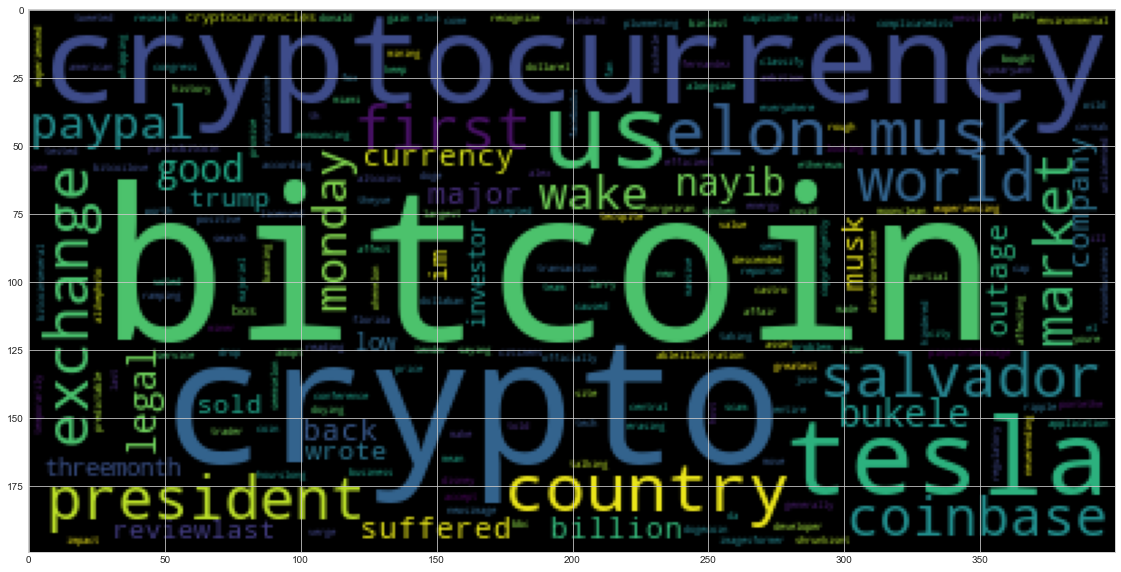

In [25]:
# Generate the Bitcoin word cloud
# We re-use the "btc_tokens_string" variable created above 
#(= concatenated all the tokens in one string since WorldCloud needs a string)
btc_wc = WordCloud().generate(btc_tokens_string)
plt.imshow(btc_wc)

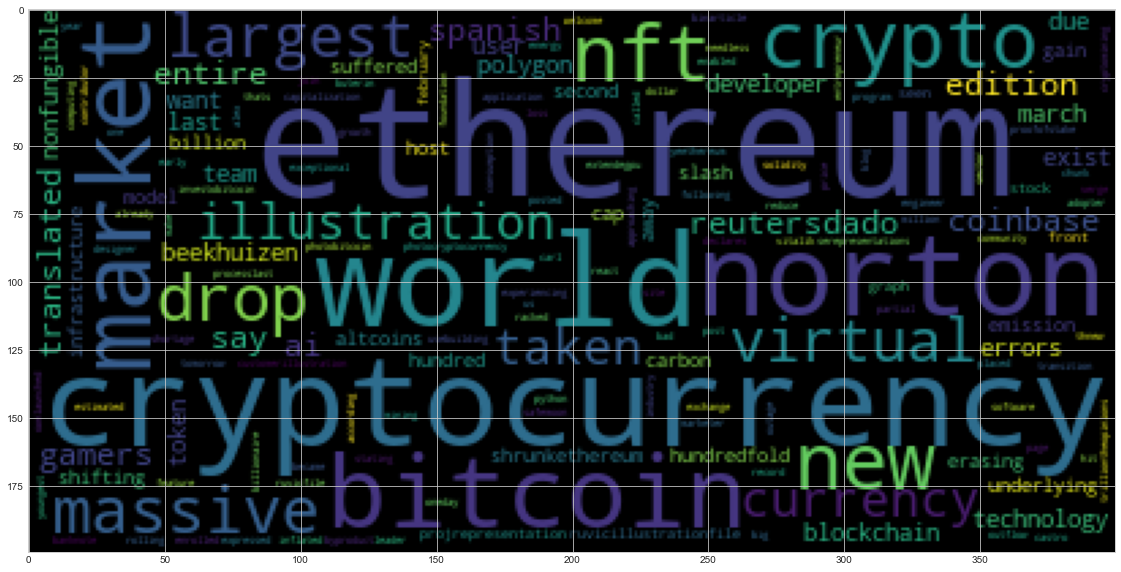

In [26]:
# Generate the Ethereum word cloud
# We re-use the "eth_tokens_string" variable created above 
#(= concatenated all the tokens in one string since WorldCloud needs a string)
eth_wc = WordCloud().generate(eth_tokens_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
btc_text= btc_df.text.str.cat()
btc_text

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]Last week, whenElon Musk tweeted that he had spoken with the team of Doge developers about how to make the coin more efficient, the impact was predictable: It sent Dogecoin to the moon. It was just t… [+3313 chars]It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, f

In [30]:
# Run the NER processor on all of the text
btc_doc= nlp(btc_text)

# Add a title to the document
btc_doc.user_data['title']= 'Bitcoin Named Entity Recognition (NER) visualization'

In [31]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [32]:
# List all Entities
btc_entities = [(x.text, x.label_) for x in btc_doc.ents] 
btc_entities

[("El Salvador's", 'GPE'),
 ('Nayib Bukele', 'PERSON'),
 ('Central American', 'NORP'),
 ('Salvador', 'ORG'),
 ('first', 'ORDINAL'),
 ('Nayib Bukele', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Citizens', 'ORG'),
 ('Alex Castro', 'PERSON'),
 ('The Verge\r\n\n \n\n Cryptocurrency', 'ORG'),
 ('Coinbase', 'PERSON'),
 ('this morning', 'TIME'),
 ('Coinbase', 'PERSON'),
 ('Bin', 'PERSON'),
 ('+1307 chars]Last week', 'DATE'),
 ('Musk', 'PERSON'),
 ('Dogecoin', 'GPE'),
 ('Elon Musk', 'PERSON'),
 ('Tesla', 'PERSON'),
 ('the past few months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Tesla', 'ORG'),
 ('$1.5 billion', 'MONEY'),
 ('Elon Musk', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('Bitcoin', 'PERSON'),
 ('Ethereum', 'ORG'),
 ('Altcoins', 'PERSON'),
 ('Tuesday night', 'TIME'),
 ('Wednesday', 'DATE'),
 ('morning', 'TIME'),
 ('months', 'DATE'),
 ('hundreds of billions', 'MONEY'),
 ('hours-long', 'TIME'),
 ('this morning', 'TIME'),
 ('May 19th', 'DATE'),
 ('US', 'GPE'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_text= eth_df.text.str.cat()
eth_text

'Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk m… [+1182 chars]Ethereum, the second largest cryptocurrency after bitcoin, is just months away from shifting its underlying infrastructure to a new model that would slash its carbon emissions a hundredfold, the proj… [+3301 chars]A representation of virtual currency Ethereum is seen in front of a stock graph in this illustration taken February 19, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoCryptocurrency Ethereum extende… [+1099 chars]GPU shortages and inflated prices have become a byproduct of the growth of cryptomining. Needless to say, that\'s bad news for the gamers that make up a big chunk of the computing industry\'s customer … [+1461 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its e

In [34]:
# Run the NER processor on all of the text
eth_doc= nlp(eth_text)

# Add a title to the document
eth_doc.user_data['title']= 'Ethereum Named Entity Recognition (NER) visualization'

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [36]:
# List all Entities
eth_entities = [(x.text, x.label_) for x in eth_doc.ents] 
eth_entities

[('Bitcoin, Ethereum', 'ORG'),
 ('Altcoins', 'PERSON'),
 ('Tuesday night', 'TIME'),
 ('Wednesday', 'DATE'),
 ('morning', 'TIME'),
 ('months', 'DATE'),
 ('hundreds of billions', 'MONEY'),
 ('second', 'ORDINAL'),
 ('just months', 'DATE'),
 ('Ethereum', 'ORG'),
 ('February 19, 2021', 'DATE'),
 ('Alex Castro', 'PERSON'),
 ('The Verge\r\n\n \n\n Cryptocurrency', 'ORG'),
 ('Coinbase', 'PERSON'),
 ('this morning', 'TIME'),
 ('Coinbase', 'PERSON'),
 ('Bin', 'PERSON'),
 ('Spanish', 'NORP'),
 ('AI', 'ORG'),
 ('Last May', 'DATE'),
 ('Buterin', 'PERSON'),
 ('27', 'CARDINAL'),
 ('99.95%', 'PERCENT'),
 ('Carl Beekhuizen', 'PERSON'),
 ('the Ethereum Foundation', 'ORG'),
 ('Beekhuizen', 'ORG'),
 ('tomorrow', 'DATE'),
 ('Norton', 'ORG'),
 ('Norton', 'ORG'),
 ('Norton Crypto', 'PERSON'),
 ('chars]"We', 'NORP'),
 ('Bitcoin', 'PERSON'),
 ('U.S. Dollar', 'ORG'),
 ('May 26, 2020', 'DATE'),
 ('Dado Ruvic/File PhotoBitcoin', 'PERSON'),
 ('last week', 'DATE'),
 ('one-day', 'DATE'),
 ('March last year', 'DATE')

---